# Libraries

In [2]:
from datetime import datetime, timedelta

import yfinance as yf

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  Vars

In [3]:
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'TSLA',
    'AMD',
    'AU',
    'AEM',
    'GFI'
]

pre_covid = "2020-01-01"

yesterday: str = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
days_ago_hour: str = (datetime.today() - timedelta(days=720)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

data = yf.download(symbols, start=pre_covid, end=today, interval="1d")
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


# PCA Model

In [4]:
pca = PCA(n_components=3)
pca.fit(portfolio_returns)


pct = pca.explained_variance_ratio_
pca_components = pca.components_

# Visualise Components

(0.0, 100.0)

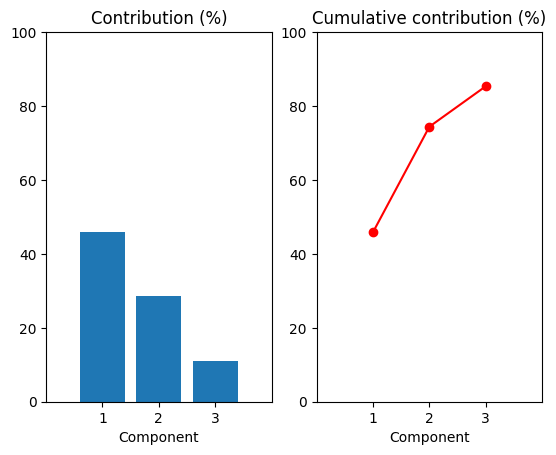

In [5]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

# Get / Isolate Alpha

In [ ]:
pass